In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
path='/Users/hoda/Downloads/DATA SET/amazon_reviews_us_Video_DVD_v1_00.tsv'
df=pd.read_csv(path,delimiter='\t',error_bad_lines=False,warn_bad_lines=False)


In [55]:
# checking the 5 first rows
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,27288431,R33UPQQUZQEM8,B005T4ND06,400024643,Yoga for Movement Disorders DVD: Rebuilding St...,Video DVD,5.0,3.0,3.0,N,Y,This was a gift for my aunt who has Parkinson'...,This was a gift for my aunt who has Parkinson'...,2015-08-31
1,US,13722556,R3IKTNQQPD9662,B004EPZ070,685335564,Something Borrowed,Video DVD,5.0,0.0,0.0,N,Y,Five Stars,Teats my heart out.,2015-08-31
2,US,20381037,R3U27V5QMCP27T,B005S9EKCW,922008804,Les Miserables (2012) [Blu-ray],Video DVD,5.0,1.0,1.0,N,Y,Great movie!,Great movie.,2015-08-31
3,US,24852644,R2TOH2QKNK4IOC,B00FC1ZCB4,326560548,Alien Anthology and Prometheus Bundle [Blu-ray],Video DVD,5.0,0.0,1.0,N,Y,Amazing,My husband was so excited to receive these as ...,2015-08-31
4,US,15556113,R2XQG5NJ59UFMY,B002ZG98Z0,637495038,Sex and the City 2,Video DVD,5.0,0.0,0.0,N,Y,Five Stars,Love this series.,2015-08-31


In [56]:
# Data columns' name
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [57]:
# size of Dataset
print(df.shape)
print('Total reviews:',df.shape[0])



(5049291, 15)
Total reviews: 5049291


In [58]:
# checking Null values
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049291 entries, 0 to 5049290
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   marketplace        5049291 non-null  object        
 1   customer_id        5049291 non-null  int64         
 2   review_id          5049291 non-null  object        
 3   product_id         5049291 non-null  object        
 4   product_parent     5049291 non-null  int64         
 5   product_title      5049291 non-null  object        
 6   product_category   5049291 non-null  object        
 7   star_rating        5049287 non-null  float64       
 8   helpful_votes      5049287 non-null  float64       
 9   total_votes        5049287 non-null  float64       
 10  vine               5049287 non-null  object        
 11  verified_purchase  5049287 non-null  object        
 12  review_headline    5049218 non-null  object        
 13  review_body        5049260 

In [59]:
print("Total number of ratings  :",df.star_rating.nunique())
print("Total number of users    :", df.customer_id.nunique())
print("Total number of products :", df.product_id.nunique())

Total number of ratings  : 5
Total number of users    : 2071004
Total number of products : 297525


In [63]:
# Checking duplacte rows
duplicate=df[df.duplicated()]
duplicate.any()

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline      False
review_body          False
review_date          False
dtype: bool

In [64]:
# Statictic reviews
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,5.049291e+06,5.049291e+06,5.049287e+06,5.049287e+06,5.049287e+06
mean,3.094148e+07,4.998088e+08,4.301129e+00,2.964645e+00,4.562956e+00
std,1.524062e+07,2.882336e+08,1.181560e+00,1.911466e+01,2.204417e+01
min,1.000100e+04,1.658000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.667348e+07,2.494515e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,3.171011e+07,5.020783e+08,5.000000e+00,0.000000e+00,1.000000e+00
75%,4.522751e+07,7.515318e+08,5.000000e+00,2.000000e+00,4.000000e+00
max,5.309659e+07,9.999959e+08,5.000000e+00,2.092800e+04,2.298200e+04


In [65]:
# Number of Null values in the whole dataset
missing_value=df.isnull().sum()
missing_value

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            4
helpful_votes          4
total_votes            4
vine                   4
verified_purchase      4
review_headline       73
review_body           31
review_date          436
dtype: int64

In [66]:
# make dataset smaller , Choose 4 features
df_reduced = df[['customer_id', 'product_id', 'star_rating', 'product_title']]

In [67]:
# Number of duplicated rows in selected dataset
duplicates = df_reduced[df_reduced.duplicated()]

len(duplicates)

11039

In [68]:
# deleting duplicated data
df_reduced = df_reduced[~df_reduced.duplicated()]

In [69]:
# Size of the reduced dataset
print('Size of dataset:',df_reduced.shape)
print('Total reviews in reduced dataset',df_reduced.shape[0])

Size of dataset: (5038252, 4)
Total reviews in reduced dataset 5038252


In [70]:
# 5 first rows
df_reduced.head(5)

,customer_id,product_id,star_rating,product_title
0,27288431,B005T4ND06,5.0,Yoga for Movement Disorders DVD: Rebuilding St...
1,13722556,B004EPZ070,5.0,Something Borrowed
2,20381037,B005S9EKCW,5.0,Les Miserables (2012) [Blu-ray]
3,24852644,B00FC1ZCB4,5.0,Alien Anthology and Prometheus Bundle [Blu-ray]
4,15556113,B002ZG98Z0,5.0,Sex and the City 2


In [71]:
df_reduced
print("Total number of ratings :",df_reduced.star_rating.nunique())
print("Total number of users   :", df_reduced.customer_id.nunique())
print("Total number of products:", df_reduced.product_id.nunique())
print("Total number of titles  :", df_reduced.product_title.nunique())

Total number of ratings : 5
Total number of users   : 2071004
Total number of products: 297525
Total number of titles  : 272361


In [72]:
# Checking dataset for Null values
df_reduced.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5038252 entries, 0 to 5049290
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   customer_id    5038252 non-null  int64  
 1   product_id     5038252 non-null  object 
 2   star_rating    5038248 non-null  float64
 3   product_title  5038252 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 192.2+ MB


In [73]:
# Number of Null values
df_reduced.isnull().sum()

customer_id      0
product_id       0
star_rating      4
product_title    0
dtype: int64

In [74]:
df_reduced.describe()

,customer_id,star_rating
count,5.038252e+06,5.038248e+06
mean,3.091728e+07,4.301389e+00
std,1.524148e+07,1.181123e+00
min,1.000100e+04,1.000000e+00
25%,1.664697e+07,4.000000e+00
50%,3.165747e+07,5.000000e+00
75%,4.520624e+07,5.000000e+00
max,5.309659e+07,5.000000e+00


In [75]:
print("Unique value of Rating:",df_reduced.star_rating.unique())

Unique value of Rating: [ 5.  4.  1.  3.  2. nan]


In [76]:
# deleting NA
df_reduced=df_reduced.dropna()

In [77]:
print("Unique value of Rating:",df_reduced.star_rating.unique())

Unique value of Rating: [5. 4. 1. 3. 2.]


In [78]:
# data visualization

In [79]:

ratings = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].mean())
# number of rateing to DVDs
ratings['ratings_count'] = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].count())
# calculate mean of rating for each DVDs
ratings['ratings_average'] = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].mean())
ratings.head(5)

,star_rating,ratings_count,ratings_average
product_id,,,
0000143502,5.0,1,5.0
0000143529,5.0,1,5.0
0000143561,2.0,1,2.0
000014357X,4.8,5,4.8
0000143588,5.0,1,5.0


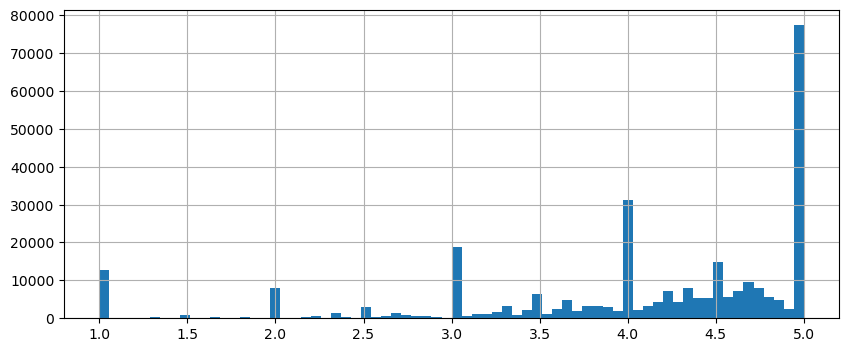

In [80]:
plt.figure(figsize=(10,4))
ratings['star_rating'].hist(bins=70)
plt.show()

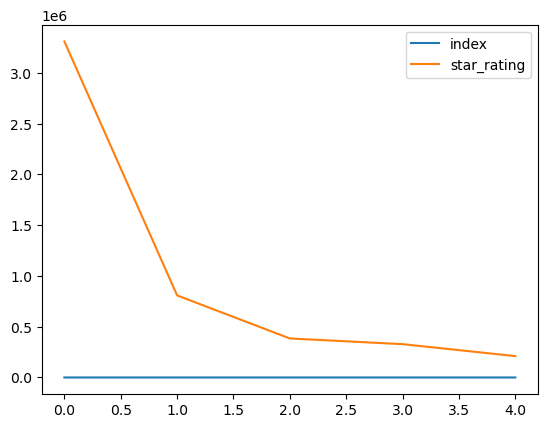

In [81]:
d=df_reduced['star_rating'].value_counts().reset_index()
d.plot()
plt.show()

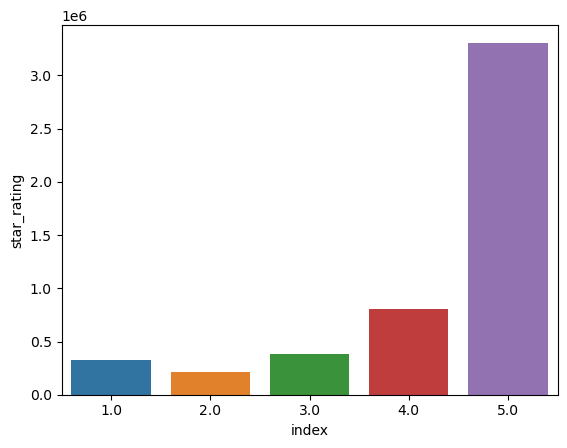

In [82]:
d=df_reduced['star_rating'].value_counts().reset_index()
sb.barplot(
    x='index',
    y='star_rating',
    data=d
    
    
)
plt.show()

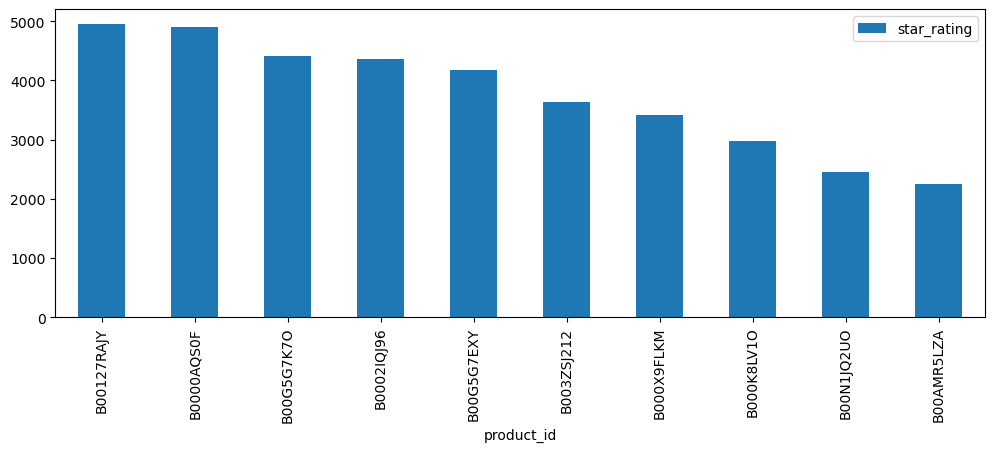

In [83]:
# Most top 10 products
popular_products = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].count())
most_popular = popular_products.sort_values('star_rating', ascending=False)
most_popular.head(10).plot(kind = "bar",figsize=(12, 4))
plt.show()

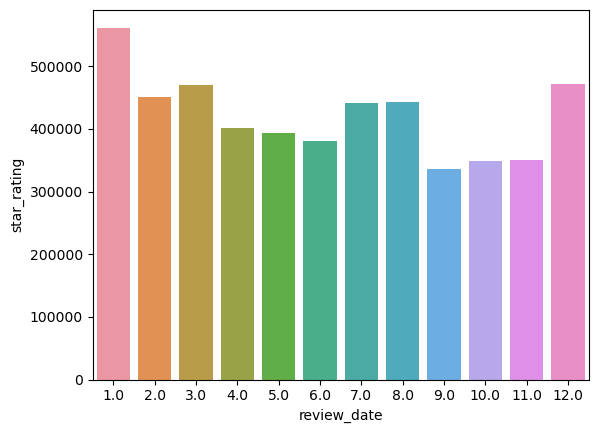

In [84]:
# Number of rating base of each months
df['review_date']=pd.to_datetime(df.review_date)
xx=df.groupby(df.review_date.dt.month).star_rating.count().reset_index()
sb.barplot(x='review_date',y='star_rating',data=xx)
plt.show()

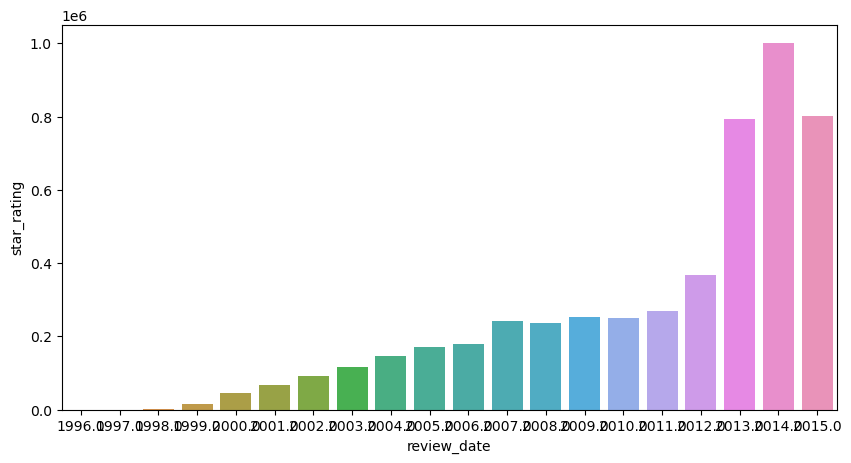

In [85]:
# Number of rating base of years
d2=df.groupby(df.review_date.dt.year).star_rating.count().reset_index()
fig=plt.gcf()
fig.set_size_inches(10,5)
sb.barplot(x='review_date',y='star_rating',data=d2)

plt.show()